<a href="https://colab.research.google.com/github/SteelworkerDB/ML_W3/blob/main/Ejercicio_Matriz_Confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
#importar seaborn y pyplot para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#importar sklearn para modelado
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#importar métricas de sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#importación del clasificador
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [23]:
#Carga de datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns=['outcome'])
print(y.value_counts(normalize=True))
X.head()

outcome
1          0.627417
0          0.372583
dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
#Revisión de los datos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


In [26]:
y.value_counts()

outcome
1          357
0          212
dtype: int64

In [27]:
#Sepración de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

In [28]:
#Instancia del escalador
scaler = StandardScaler()

In [29]:
#Ajuste del escalador
scaler.fit(X_train)

StandardScaler()

In [30]:
#Escalar los datos de X_train
X_train_s=scaler.transform(X_train)
y_train=y_train.values.ravel()

In [31]:
#Escalar los datos de X_test
X_test_s=scaler.transform(X_test)


In [32]:
#Instancia de los modelos
dt=DecisionTreeClassifier(random_state=42)
bg=BaggingClassifier(random_state=42)
rf=RandomForestClassifier(random_state=42)


In [33]:
#Ajuste de los modelos al conjunto de entrenamiento
dt.fit(X_train,y_train)
bg.fit(X_train,y_train)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [34]:
#Predicciones de los modelos
y_predt=dt.predict(X_test)
y_predb=bg.predict(X_test)
y_predrf=rf.predict(X_test)

In [35]:
#Precisión del modelo dt
dt_tr_score = dt.score(X_train, y_train)
dt__tst_score = dt.score(X_test, y_test)
print("Precisión entrenamiento ",dt_tr_score)
print("Precisión prueba ",dt__tst_score)

Precisión entrenamiento  1.0
Precisión prueba  0.9181286549707602


In [36]:
#Precision del modelo baggedtree
bg_tr_score = bg.score(X_train, y_train)
bg_tst_score = bg.score(X_test, y_test)
print("Precisión entrenamiento ",bg_tr_score)
print("Precisión prueba ",bg_tst_score)

Precisión entrenamiento  1.0
Precisión prueba  0.9590643274853801


In [37]:
#Precisión del modelo Random Forest
rf_tr_score = rf.score(X_train, y_train)
rf_tst_score = rf.score(X_test, y_test)
print("Precisión entrenamiento ",rf_tr_score)
print("Precisión prueba ", rf_tst_score)

Precisión entrenamiento  1.0
Precisión prueba  0.935672514619883


- El modelo de mayor precisión es el de Bagging, pero todos son bastante altos

---
Creen la matriz de confusión para responder las siguientes preguntas:

2) ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

3) ¿Cuántos falsos positivos había?

4) ¿Cuántos falsos negativos había?

5) Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.  

---

In [38]:
list(data.target_names)

['malignant', 'benign']

2)  La clase 'malignant' se identifica con valores 0, la clase 'benign' se identifica con valores 1.  'Benign' se considera como la clase positiva.

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [42]:
#Matriz de confusión del modelo baggingclassifier.
cm=confusion_matrix(y_test, y_predb)


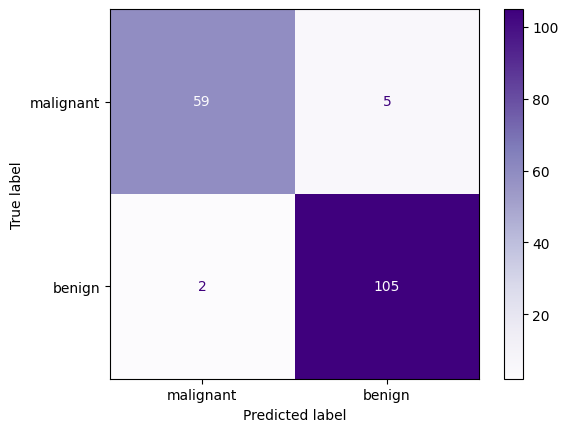

In [50]:
#Matriz de confusión, se usa un mapa de colores púrpuras
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Purples');


3)  De 107 diagnosticos benignos reales, se identificaron 105 correctamente.
Existen 2 falsos negativos. Error tipo 2.

4)  De 64 diagnosticos falsos reales, se identificaron correctamente 59.
Existen 5 falsos positivos. Error tipo 1.

5) En este ejercicio el problama más grande son los falsos positivos, es decir cuando el modelo determina que es benigno cuando en realidad no lo es.  Esto porque se pone en peligro la salud del paciente.  